<a href="https://colab.research.google.com/github/amandinha-gomes/data-cleaning-e-preprocessing/blob/main/Data_Cleaning_e_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# ===========================================
# Projeto: Data Cleaning e Preprocessing
# ===========================================

# Importação das bibliotecas
import pandas as pd
import numpy as np

# ===========================================
# 1 - Leitura dos dados
# ===========================================

df = pd.read_csv('dados_brutos.csv')
df.head()

# ===========================================
# 2️ - Informações gerais
# ===========================================

df.info()
df.describe()
df.isnull().sum()

# ===========================================
# 3️ - Tratamento de valores ausentes
# ===========================================

# Exemplo: preencher idade média
df['Idade'] = df['Idade'].fillna(df['Idade'].mean())

# Exemplo: remover registros com renda nula
df = df.dropna(subset=['Renda Individual Mensal'])

# ===========================================
# 4️ - Padronização de tipos
# ===========================================

df['Idade'] = df['Idade'].astype(int)
df['Cor'] = df['Cor'].str.title()  # deixa com inicial maiúscula

# ===========================================
# 5️ - Remoção de outliers
# ===========================================

# Exemplo: remover idades fora do intervalo esperado
df = df[(df['Idade'] > 10) & (df['Idade'] < 100)]

# Exemplo: remover rendas absurdamente altas (acima do percentil 99)
limite_renda = df['Renda Individual Mensal'].quantile(0.99)
df = df[df['Renda Individual Mensal'] < limite_renda]

# ===========================================
# 6️ - Criação de variáveis derivadas
# ===========================================

# Exemplo: faixa de renda
df['Faixa de Renda'] = pd.cut(
    df['Renda Individual Mensal'],
    bins=[0, 1500, 3000, 6000, 12000, np.inf],
    labels=['Até 1.5K', '1.5K-3K', '3K-6K', '6K-12K', '12K+']
)

# ===========================================
# 7️ - Exportação dos dados tratados
# ===========================================

df.to_csv('dados_tratados.csv', index=False)
print("Dados tratados exportados com sucesso!")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Idade                             281 non-null    float64
 1   Cor                               280 non-null    object 
 2   Orientação Sexual                 290 non-null    object 
 3   Identidade de Gênero              292 non-null    object 
 4   Renda Individual Mensal           285 non-null    float64
 5   Renda familiar mensal aproximada  284 non-null    float64
 6   Renda per capita                  300 non-null    float64
 7   Estado                            300 non-null    object 
 8   Situação                          300 non-null    object 
dtypes: float64(4), object(5)
memory usage: 21.2+ KB
Dados tratados exportados com sucesso!


,Idade,Cor,Orientação Sexual,Identidade de Gênero,Renda Individual Mensal,Renda familiar mensal aproximada,Renda per capita,Estado,Situação,Faixa de Renda
0,54,Parda,Homossexual,Mulher Cis,3375.76,5544.89,1108.98,BA,Estudando,3K-6K
1,44,Parda,Heterossexual,Mulher Cis,3162.36,10781.50,2156.30,RS,Empregado e Estudando,3K-6K
2,30,Branca,Heterossexual,Homem Cis,3725.28,10465.75,2093.15,RJ,Empregado e Estudando,3K-6K
3,58,Parda,Heterossexual,Mulher Trans,3913.36,8844.78,4422.39,RJ,Empregado,3K-6K
4,23,NaN,Heterossexual,Homem Cis,1761.89,3337.56,1668.78,MG,Estudando,1.5K-3K


In [8]:
# Quantas linhas havia antes e depois
print("Antes:", pd.read_csv('dados_brutos.csv').shape)
print("Depois:", pd.read_csv('dados_tratados.csv').shape)

Antes: (300, 9)
Depois: (282, 10)


In [9]:
# Comparar linhas removidas
bruto = pd.read_csv('dados_brutos.csv')
tratado = pd.read_csv('dados_tratados.csv')

# Mostrar as linhas que existiam no bruto e foram removidas
linhas_removidas = bruto[~bruto['Renda Individual Mensal'].isin(tratado['Renda Individual Mensal'])]
linhas_removidas.head()

,Idade,Cor,Orientação Sexual,Identidade de Gênero,Renda Individual Mensal,Renda familiar mensal aproximada,Renda per capita,Estado,Situação
47,17.0,Branca,Heterossexual,Homem Cis,NaN,20226.50,10113.25,PR,Estudando
78,31.0,Branca,Heterossexual,Homem Cis,8027.98,17456.48,8728.24,PE,Desempregado
81,41.0,Branca,Heterossexual,Homem Cis,NaN,5344.05,2672.02,RS,Desempregado
82,40.0,Branca,Heterossexual,Homem Cis,NaN,17937.12,5979.04,PR,Empregado
106,22.0,Branca,Heterossexual,Mulher Cis,NaN,6362.84,1272.57,MG,Empregado


In [10]:
set(tratado.columns) - set(bruto.columns)

{'Faixa de Renda'}

## 📊 Interpretação dos Resultados

#####  **Distribuição de Renda:** o gráfico mostra que os dados brutos tinham valores muito altos (outliers) distorcendo a curva Após a limpeza, a distribuição ficou mais concentrada nas faixas comuns (até R$12.000).

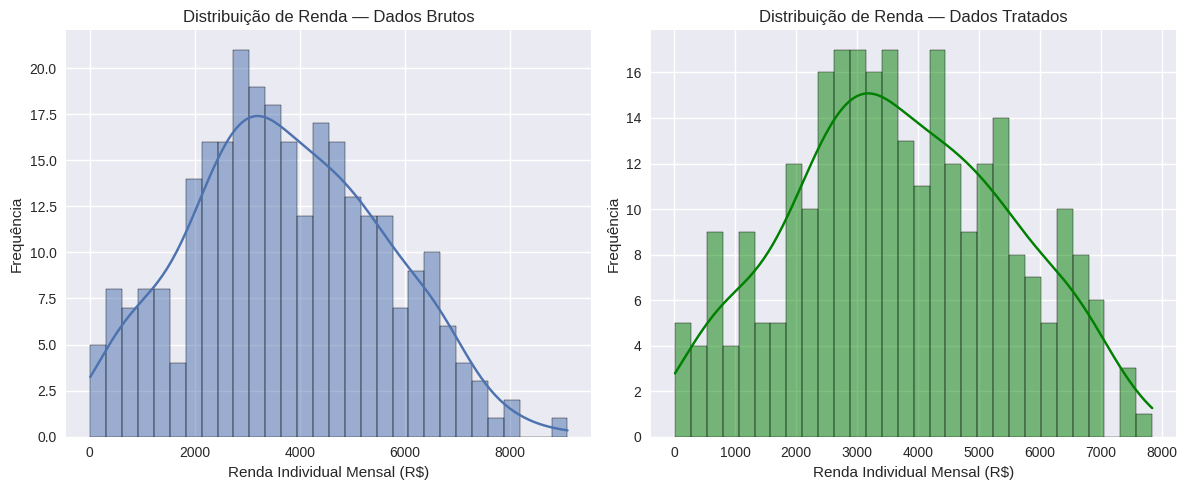

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

bruto = pd.read_csv('dados_brutos.csv')
tratado = pd.read_csv('dados_tratados.csv')

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(bruto['Renda Individual Mensal'], bins=30, kde=True)
plt.title('Distribuição de Renda — Dados Brutos')
plt.xlabel('Renda Individual Mensal (R$)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(tratado['Renda Individual Mensal'], bins=30, kde=True, color='green')
plt.title('Distribuição de Renda — Dados Tratados')
plt.xlabel('Renda Individual Mensal (R$)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

##### **Tratamento de Nulos:** a redução de registros e ausência de valores ausentes confirmam que a limpeza foi bem-sucedida.

In [15]:
print("Comparação de Tamanho")
print("Antes da limpeza:", bruto.shape)
print("Depois da limpeza:", tratado.shape)

print("\n Valores nulos antes:")
print(bruto.isnull().sum())

print("\n Valores nulos depois:")
print(tratado.isnull().sum())

Comparação de Tamanho
Antes da limpeza: (300, 9)
Depois da limpeza: (282, 10)

 Valores nulos antes:
Idade                               19
Cor                                 20
Orientação Sexual                   10
Identidade de Gênero                 8
Renda Individual Mensal             15
Renda familiar mensal aproximada    16
Renda per capita                     0
Estado                               0
Situação                             0
dtype: int64

 Valores nulos depois:
Idade                                0
Cor                                 19
Orientação Sexual                   10
Identidade de Gênero                 8
Renda Individual Mensal              0
Renda familiar mensal aproximada    13
Renda per capita                     0
Estado                               0
Situação                             0
Faixa de Renda                       0
dtype: int64


##### **Remoção de Outliers:** o corte no percentil 99 eliminou os rendimentos extremos que poderiam enviesar médias.

/tmp/ipython-input-1634244163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Faixa de Renda', data=tratado, palette='viridis')


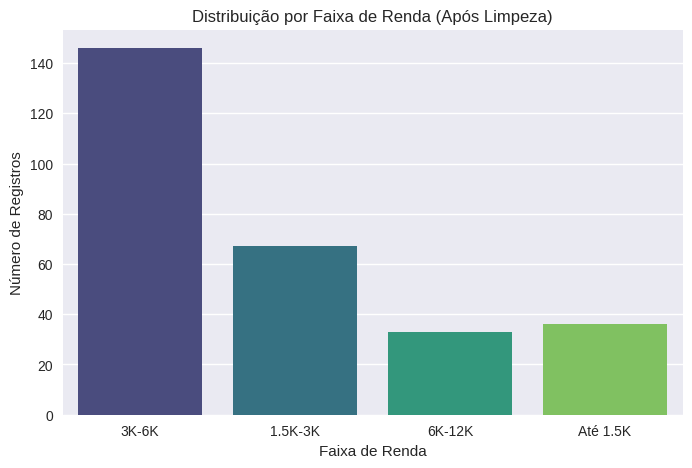

In [13]:
# Contagem por faixa de renda após o tratamento
plt.figure(figsize=(8,5))
sns.countplot(x='Faixa de Renda', data=tratado, palette='viridis')
plt.title('Distribuição por Faixa de Renda (Após Limpeza)')
plt.xlabel('Faixa de Renda')
plt.ylabel('Número de Registros')
plt.show()